# 2D MASW arrays pre-processing
Aser Abbas | Utah State University

In [1]:
import swprocess
import numpy as np
import itertools
import os

In [2]:
def create_files(line,segment,left_shot_files,right_shot_files,first_sensor,number_of_receivers_per_segment):
    file_no = list(itertools.chain(left_shot_files, right_shot_files))
    print(f"files processed for segment {line}{segment} are {file_no}")
    for no in file_no:
        array = swprocess.Array1D.from_files(f"TxDot VD MASW {line}/{no}.dat")
        if first_sensor != 0:
            del array.sensors[0:first_sensor]
        del array.sensors[number_of_receivers_per_segment:]
        swprocess.Array1D.to_file(array, f"processing/line{line}/{line}{segment}/raw_data/{no}.dat")
#     array.plot()

# Create Template

In [3]:
# create directories and subdirectories for each line
line ="D"
for i in range(1,14):
    if not os.path.exists(f"processing/line{line}/{line}{i}"):
        os.makedirs(f"processing/line{line}/{line}{i}")
        os.makedirs(f"processing/line{line}/{line}{i}/masw")
        os.makedirs(f"processing/line{line}/{line}{i}/raw_data")
        os.makedirs(f"processing/line{line}/{line}{i}/stats")   
        os.makedirs(f"processing/line{line}/{line}{i}/inversion") 
        os.makedirs(f"processing/line{line}/{line}{i}/inversion/0_targets")
        os.makedirs(f"processing/line{line}/{line}{i}/inversion/1_parameters")   
        os.makedirs(f"processing/line{line}/{line}{i}/inversion/2_reports")
        os.makedirs(f"processing/line{line}/{line}{i}/inversion/3_texts") 

# Array Trimming

files processed for segment D1 are [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
files processed for segment D2 are [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
files processed for segment D3 are [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
files processed for segment D4 are [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
files processed for segment D5 are [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]
files processed for segment D6 are [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]
files processed for segment D7 are [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]
files processed for segment D8 are [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
files processed for segment D9 are [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 76, 77, 7

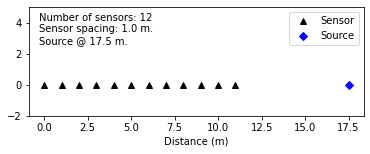

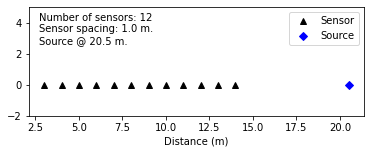

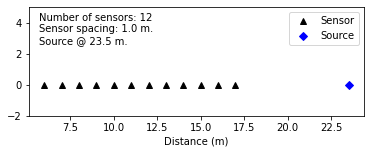

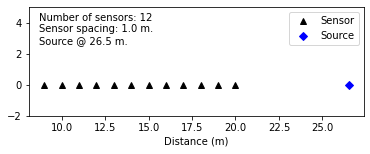

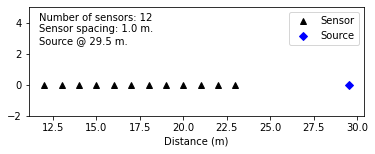

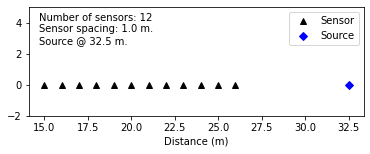

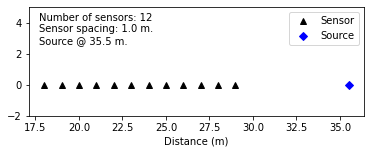

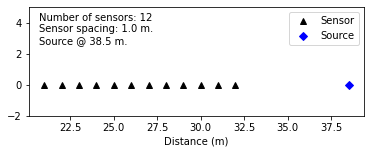

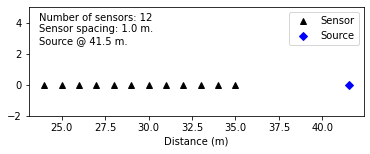

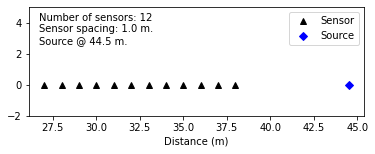

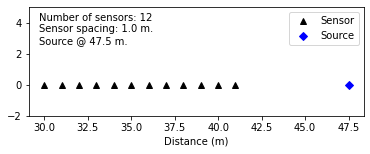

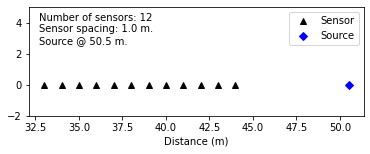

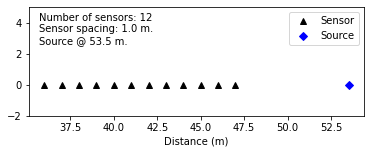

In [4]:
segments = np.arange(1,14) # the 48 receivers are divided into 13 segments of 12 receivers
first_sensors=np.arange(0,48,3) # the window is slided 3 receivers for every segment 
number_of_receivers_per_segment=12 #number of recievers per segment 

# considered shot locations to the left of the segment under consideration
left_shot_files=[range(1,11),range(6,16),range(11,21),range(16,26),range(21,31),range(26,36),
              range(31,41),range(36,46),range(41,51),range(46,56),range(51,61),range(56,66),
              range(61,71)]

# considered shot locations to the right of the segment under consideration
right_shot_files=[range(36,46),range(41,51),range(46,56),range(51,61),range(56,66),range(61,71),
              range(66,76),range(71,81),range(76,86),range(81,91),range(86,96),range(91,101),
              range(96,106)]

# creates arrays with 12 receivers and saves the files in their subdirectories
for segment, left_shot_file, right_shot_file, first_sensor in zip(segments, 
                                                                  left_shot_files, right_shot_files, first_sensors):
    
    create_files(line=line, segment=segment, left_shot_files=left_shot_file,
                 right_shot_files=right_shot_file, first_sensor=first_sensor,
                 number_of_receivers_per_segment=number_of_receivers_per_segment)
   